#### <a id='top'></a>

# Homework 3: Conditional Probability and Random Choice 
***

**Name**: Justin Yara

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 21**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (25 pts) Problem 1: Theory (Independence)

In the popular video game series Pokémon, players conduct battles between their pokémon (creatures). In the main series of games, these battles are [turn-based](#https://en.wikipedia.org/wiki/Turns,_rounds_and_time-keeping_systems_in_games#Turn-based), similar to a game of checkers, chess, or Go.

Let's create a new set of rules for a pokémon duel so they don't have to battle until they faint. For our example, we will look at Pikachu vs. Eevee. Pikachu has a higher base Speed, so they will get to move first.

* The duel is composed of an unknown number of rounds (same as Pokémon).
* Each round is still turn-based, it consists of Pikachu trying to strike Eevee, then Eevee trying to strike Pikachu.
* If Pikachu manages to strike Eevee, then Pikachu is awarded a point, and similarly if Eevee manages to strike Pikachu, then Eevee is awarded a point.
* If a round ends in a tie, then Pikachu and Eevee proceed to another round. If a round ends with one pokémon scoring a point but the other one does not, then the pokémon who scored a point wins the duel.

Let $U$ be the event that "Picachu wins the duel", $F$ be the event that "the duel ends after the first round of strikes", and $C$ be the event that "the duel continues after the first round of strikes".  Suppose that the result of one strike is independent of the other strikes, Picachu successfully lands their strikes with probability $p$ (based on their accuracy and Eevee's evasiveness), and Eevee similarly lands their strikes with probability $q$.

**Part A**: The duel will continue until Picachu or Eevee wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual strikes by $H$ for a hit and $M$ for a miss. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

HINT: Remember that Pikachu has the first strike in each round!

$\Omega$ = {MH, HM, MMHM, MMMH, HHMH, HHHM,...}

**Part B**: Determine $P(U \mid F)$ in terms of $p$ and $q$.

**Solution**:

We have 

$$
P(U \mid F) = \frac{P(U \cap F)}{P(F)} = \frac{P(\{HM\})}{P(\{HM, MH\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

**Part C**: Explain why events $C$ and $U$ are independent. 

**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that Pikachu wins and the probability that the duel goes on after the first round *must* be independent. Each round of the duel begins with the two Pokemon tied, and takes place identically, regardless of what score Pikachu and Eevee are tied at. (5 to 5 is the same as 10 to 10). So Pikachu's probability of winning beginning on round 1 versus his probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(C \mid U) = P(C)$$
which means they are independent.

**Part D**: Use the Law of Total Probability to show that $P(U) = p(1-q) + (2pq - p - q +1) ~P(U \mid C)$. 

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

\begin{eqnarray}
\nonumber P(U) &=& P(U \mid F)P(F) + P(U \mid C)P(C)  \\
\\
\nonumber  &=& P(U \mid F)P(\{HM, MH\}) + P(U \mid C)P(\{HH, MM\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} P(\{HM, MH\}) + P(U \mid C)P(\{HH, MM\})  \quad \left[\textrm{From }\textbf{Part A}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(HM)+ P(MH))\right] + P(U \mid C)\left[P(HH) + P(MM)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(U \mid C)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(U \mid C)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(U \mid C)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}

**Part E**: Use the fact from **Part B** that $P(U \mid C) = P(U)$ to determine $P(U)$ in terms of $p$ and $q$.

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

Part D tells us:
$$P(U) = p(1-q) + P(U \mid C)\left(2pq - p - q +1 \right)$$

And Part C (independence of $U$ and $C$) tells us:
$$P(U \mid C) = P(U)$$

Put them together.
$$P(U) = p(1-q) + P(U)\left(2pq - p - q +1 \right)$$

Solve algebraically for $P(U)$.
$$P(U) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(U) = \frac{p(1-q)}{-2pq + p + q }$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

They are the same because the events $U$ and $F$ are independent events. The reasoning is the same as why $U$ and $C$ are independent events.

**Part G**: Explain the significance of the solution technique for $P(U)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

We went this route to prove that the events are independent and in addition we did not have the probability values for p,q. The assumptions that we made to use this solution approach was that the events are independent and that strikes of both Pokemon $p$ and $q$ are based on their accuracy.

[Back to top](#top)
<a id='p2'></a>

## (30 pts) Problem 2: Computation (Joker Poker Hands)
***


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.  For the markdown portions of this problem, you may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.

**Part A:**

Suppose we draw 5 cards at random from the deck.  What is the probability that we have a "3 of a kind:" a hand with 3 copies of one face card and the other two cards unmatched?

**Solution:** 

The easist way to do this probable directly counting:

There are 52 choose 5 total hands.  To get 3 of a kind, we need to choose one card value to be the triple (13 ways), which suits are in the triple (4 ways) and then choose 2 unmatched cards for the other two cards.  There are 48 ways for the first such card, then 44 for the second, but this overcounts by 2x since order doesn't matter.  This gives:

$$\frac{13 \cdot 4 \cdot 22 \cdot 48\cdot 5!}{52 \cdot 51 \cdot50 \cdot49 \cdot 48} \approx 2.1\%$$

**Part B:**

Suppose we add a single "Joker" card to the deck.  The Joker may serve as a copy of any card in the deck, including one already in our hand.  

Suppose we draw 5 cards at random from the deck.  What is the probability that we now have "3 of a kind?"  This should now include hands with 2 copies of one face and a joker (and the other 2 as non-paired cards).

**Solution:**

The first way to get a triple is the same as part A, but now with a 53 card deck.  The second way is to have a single pair, the one joker, and 2 unmatched cards.  The unmatched cards still have 48 and 44 ways, but the ways to make a pair now include choosing 2 of the 4 cards of that value to pair up (6 ways).  We can add them:

$$\frac{13 \cdot 4 \cdot 22 \cdot 48\cdot 5!}{53 \cdot 52 \cdot 51 \cdot50 \cdot49} + \frac{13 \cdot 6 \cdot 22 \cdot 48\cdot 5!}{53 \cdot 52 \cdot 51 \cdot50 \cdot49}=\frac{13 \cdot 10 \cdot 22 \cdot 48\cdot 5!}{53 \cdot 52 \cdot 51 \cdot50 \cdot49} $$

**Part C:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.  Verify that the result is consistent with your answer to part A.

In [14]:
#build a deck
suits=['D','H','C','S']
cardvalues=np.array(range(1,14,1))
cards=[]
for suit in suits:
    for value in cardvalues:
        cards.append(str(value)+str(suit))

#function for one hand
def one_hand():
    return np.random.choice(cards, replace=False, size=5)
#function to draw a hand, check if it has 3 of a kind
def threeof():
    hand=one_hand()
    values=[int(card[:-1]) for card in hand] #strip  the suits
    counts=np.unique(values, return_counts=True)[1] #count the faces
    return (max(counts)==3 & len(counts) == 3)

nsamp=10000
threes=np.zeros(nsamp)

for ii in range(nsamp):
    threes[ii]=threeof()

print("Observed {:.5f} Proportion of Three of a kind".format(np.sum(threes)/nsamp))
thy=13*4*22*48*120/52/51/50/49/48
print("Theoretical Proportion of Three of a kind:  {:.5f} ".format(thy))


Observed 0.02420 Proportion of Three of a kind
Theoretical Proportion of Three of a kind:  0.02113 


**Part D:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck where one "Joker" card has been added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.   Verify that the result is consistent with your answer to part B.

In [15]:
#build a deck
suits=['D','H','C','S']
cardvalues=np.array(range(1,14,1))
cards=[]
for suit in suits:
    for value in cardvalues:
        cards.append(str(value)+str(suit))
cards.append('0J') #Joker as a zero
#function for one hand
def one_hand():
    return np.random.choice(cards, replace=False, size=5)
#function to draw a hand, check if it has 3 of a kind



def threeof():
    hand=one_hand()
    values=[int(card[:-1]) for card in hand] #strip  the suits
    counts=np.unique(values, return_counts=True) #count the faces
    if (max(counts[1])==3) & (len(counts[1]) == 3):
        return True
    elif (max(counts[1])==2) & (len(counts[1]) == 4) & (counts[0][0] == 0):
        return True
    else:
        return False

nsamp=10000
threes=np.zeros(nsamp)
for ii in range(nsamp):
    threes[ii]=threeof()

print("Observed {:.5f} Proportion of Three of a kind".format(np.sum(threes)/nsamp))
thy=13*10*22*48*120/52/51/50/49/53
print("Theoretical Proportion of Three of a kind:  {:.5f} ".format(thy))


Observed 0.04910 Proportion of Three of a kind
Theoretical Proportion of Three of a kind:  0.04784 


**Part E:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck with four "Joker" cards added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed. (NB: 3 unpaired cards and 2 Jokers is the new case of "3 of a kind".)

In [16]:
#build a deck
suits=['D','H','C','S']
cardvalues=np.array(range(1,14,1))
cards=[]
for suit in suits:
    for value in cardvalues:
        cards.append(str(value)+str(suit))
cards.append('0J') #Joker as a zero
cards.append('0J') #Joker as a zero
cards.append('0J') #Joker as a zero
cards.append('0J') #Joker as a zero
#function for one hand
def one_hand():
    return np.random.choice(cards, replace=False, size=5)
#function to draw a hand, check if it has 3 of a kind

def threeof():
    hand=one_hand()
    values=[int(card[:-1]) for card in hand] #strip  the suits
    counts=np.unique(values, return_counts=True) #count the faces
    #More terms here: exclude if 3 of a kind were all jokers
    if (max(counts[1])==3) & (len(counts[1]) == 3) & (counts[0][0] != 0):
        return True
    #More terms here: exclude if 2 of a kind were jokers
    elif (max(counts[1])==2) & (len(counts[1]) == 4) & (counts[0][0] == 0) & (counts[1][0] == 1):
        return True
    #New case: 2 jokers, else unmatched
    elif (counts[0][0] == 0) & (counts[1][0] == 2)& (len(counts[1]) == 4):
        return True
    else:
        return False

nsamp=10000
threes=np.zeros(nsamp)
for ii in range(nsamp):
    threes[ii]=threeof()

print("Observed {:.5f} Proportion of Three of a kind".format(np.sum(threes)/nsamp))


Observed 0.12360 Proportion of Three of a kind


[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation
*** 

In this problem you will write some code to simulate the movement of budding Data Scientist Skyler - founder of infamous Skynet - as they navigate their way through the Engineering Center Lobby between classes.  Skyler has 10 minutes to navigate the labryinthine space below:

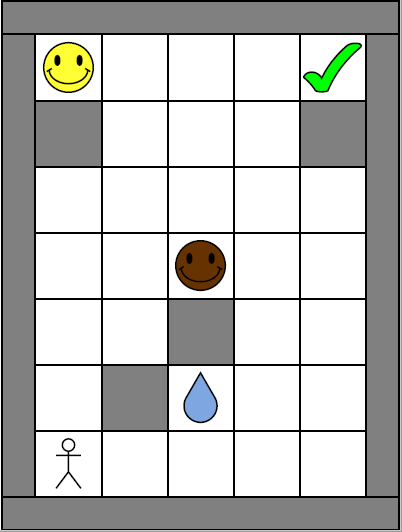

Skyler starts at the bottom left (SW) corner, a square we will refer to as $(0,0)$, and is trying to reach their next class in the top right (or NE) corner, a square at (4,6) using a standard cartesian system.

Skyler, unfortunately, is very disoriented and their movement is partly random.  1/3 of the time Skyler will try to walk North; 1/3 of the time Skyler will try to walk East, and the rest of the time Skyler will split evenly between South and West.

Your goal is to figure out what the probability is that Skyler makes it to (4,6) before running out of time, with the following hazards:

 - Skyler walks at a standard rate of 10 seconds per tile.  If Skyler walks into one of the dark-shaded walls or pillars, they remain where they started, but it still takes 10 seconds.

 - Someone spilled a foul-smelling energy drink at (2,1).  If Skyler moves into the tile in (2,1), they are completely grossed out.  They move back to the start at (0,0) and spend a little time cleaning their shoes, losing 60 additional seconds beyond the time to originally move into (2,1).
 
 - Skyler's data science professor is drinking coffee at (2,3), and Skyler hasn't turned in their homework for a week and a half.  If Skyler walks to that tile, they suffer through some tedious conversation and then shuffle *backwards* from where they came by an extra tile, so if they encountered the professor in a movement from (1,3) to (2,3) they would recoil back to (0,3).  This entire process takes 90 seconds, including all movement.
 
 - Skyler's best friend and coding collaborator is at (0,6).  Should Skyler walk there, they will engage in a lengthy conversation, taking 120 seconds, including all movement.



<br>

**Part A**: Complete the function sky_step below. The function should simulate one step of Skyler's.  It should take as arguments the Skyler's current location on the board as well as the the time elapses, and return Skyler's new location and time elapses after the movement has completed. Note that if Skyler runs out of time, you should return 310 and not any additional wasted time.

In [17]:
def sky_step(location, time):    
    dirs = np.array(["up", "down" ,"left", "right", "up", "right"])

    newcandidate=location.copy()
    move=np.random.choice(dirs)
    if move=="up":
        newcandidate[1]+=1
    if move=="down":
        newcandidate[1]-=1
    if move=="left":
        newcandidate[0]-=1
    if move=="right":
        newcandidate[0]+=1
        
    #wallchecks
    if (newcandidate[0] > 4) or (newcandidate[0] <0) or\
    (newcandidate[1] > 6) or (newcandidate[1] <0) or\
    (newcandidate in [[1,1],[2,2],[0,5],[4,5]]):
        time+=10
        return location, time 
    #drink check
    if (newcandidate == [2,1]):
        newcandidate=[0,0]
        time+= 70
        return newcandidate, time
    #data science
    elif (newcandidate == [2,3]):
        if move=="down":
            newcandidate[1]+=2
        if move=="left":
            newcandidate[0]-=2
        if move=="right":
            newcandidate[0]+=2
        time+= 90
        return newcandidate, time
    #friend
    elif (newcandidate == [0,6]):
        time+= 120
        return newcandidate, time
    #otherwise...
    else:
        time+=10
        return newcandidate, time

**Part B**: Use your function from **Part A** to simulate at least 10000 of Skyler's 10-minute trips through the Engineering Lobby and make a frequency histogram of the Skyler's time elapsed at the end of your simulation (including instances where they did not make it in time).

In [18]:
#Simulation for Part B
def sim_skyler():
    location=[0,0]
    time=0

    while time<610:
        location, time = sky_step(location,time)
        #stop if at 4,6
        if location==[4,6]: 
            return(location, time)
    if time>610: time =610
    return(location, time)
sim_skyler()

nsamps=10000
xloc=np.zeros(nsamps)
yloc=np.zeros(nsamps)
times=np.zeros(nsamps)
df=pd.DataFrame(data={'xloc':xloc,'yloc':yloc, 'times':times})

for i in range(nsamps):
    out=sim_skyler()
    df['times'][i]=out[1]
    df['xloc'][i]=out[0][0]
    df['yloc'][i]=out[0][1]


   xloc  yloc  times
0   3.0   5.0  610.0
1   4.0   6.0  240.0
2   4.0   6.0  280.0
3   4.0   6.0  280.0
4   4.0   3.0  610.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3141ac520>]],
      dtype=object)

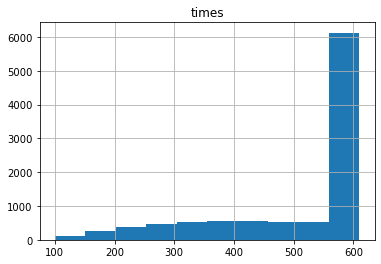

In [19]:
#Frequency histogram
print(df.head())
df.hist('times')

**Part C**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time.

In [20]:
#Estimation of probability of being on time
sum(df['times']<610)/nsamps

0.4396

**Part D**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time _given_ that they talked to their Data Science professor.  Is Skyler more or less likely to make it on time if they talk to their Data Science Professor?

In [21]:
#include an out in the sims on whether it happened
def sky_step(location, time):    
    dirs = np.array(["up", "down" ,"left", "right", "up", "right"])
    DS=False
    newcandidate=location.copy()
    move=np.random.choice(dirs)
    if move=="up":
        newcandidate[1]+=1
    if move=="down":
        newcandidate[1]-=1
    if move=="left":
        newcandidate[0]-=1
    if move=="right":
        newcandidate[0]+=1
        
    #wallchecks
    if (newcandidate[0] > 4) or (newcandidate[0] <0) or\
    (newcandidate[1] > 6) or (newcandidate[1] <0) or\
    (newcandidate in [[1,1],[2,2],[0,5],[4,5]]):
        time+=10
        return location, time, DS
    #drink check
    if (newcandidate == [2,1]):
        newcandidate=[0,0]
        time+= 70
        return newcandidate, time, DS
    #data science
    elif (newcandidate == [2,3]):
        if move=="down":
            newcandidate[1]+=2
        if move=="left":
            newcandidate[0]-=2
        if move=="right":
            newcandidate[0]+=2
        time+= 90
        DS = True
        return newcandidate, time, DS
    #friend
    elif (newcandidate == [0,6]):
        time+= 120
        return newcandidate, time, DS
    #otherwise...
    else:
        time+=10
        return newcandidate, time, DS
    
#Simulation
def sim_skyler():
    location=[0,0]
    time=0
    DataSci = 0
    while time<610:
        location, time, DS = sky_step(location,time)
        if DS == True: 
            DataSci = 1
        #stop if at 4,6
        if location==[4,6]: 
            return(location, time, DataSci)
    if time>610: time =610
    return(location, time, DataSci)
sim_skyler()

nsamps=1000
xloc=np.zeros(nsamps)
yloc=np.zeros(nsamps)
times=np.zeros(nsamps)
ds=list(np.zeros(nsamps))
df=pd.DataFrame(data={'xloc':xloc,'yloc':yloc, 'times':times, 'ds':ds})

for i in range(nsamps):
    out=sim_skyler()
    df['times'][i]=out[1]
    df['xloc'][i]=out[0][0]
    df['yloc'][i]=out[0][1]
    df['ds'][i]=out[2]


In [22]:
df.head(2)

dsp=len(df.loc[df['ds']==1])/nsamps
print('Prob of DS: {:.4f}'.format(dsp))
escape=sum(df['times']<610)/nsamps
escapeandds = len(df.loc[(df['ds']==1) & (df['times']<610)])/nsamps
print('Prob of escape and DF: {:.4f}'.format(escapeandds))

print('So the conditional of escape GIVEN DS is: {:.4f} '.format(escapeandds/dsp))
print('Compared to a baseline probability of escape of: {:.4f}'.format(escape))


Prob of DS: 0.4980
Prob of escape and DF: 0.1470
So the conditional of escape GIVEN DS is: 0.2952 
Compared to a baseline probability of escape of: 0.4380


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that Skyler talked to their Data Science professor, given that Skyler made it to class on time.

In [23]:
#Estimate probability of talking to their DS professor given being on time  

#Directly:
print('The conditional prob. of DS GIVEN escape is: {:.4f} '.format(escapeandds/escape))


The conditional prob. of DS GIVEN escape is: 0.3356 
